1. Leer el archivo Retail_Invoices.xlsx y realizar un análisis de calidad de datos, para
definir la calidad de la data entregada considerando valores anómalos, valores
faltantes, etc. Limpia lo que sea necesario y realiza un análisis exploratorio de los
datos considerando gráficos de distribuciones y correlaciones entre estos.


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans,AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

#FernandoSanchez Cargar los datos
data = pd.read_excel("Retail_Invoices.xlsx")

#FernandoSanchez Mostrar información general sobre los datos
print("Información general sobre los datos:")
print(data.info())

#FernandoSanchez Verificar si hay valores nulos
print("\nValores nulos por columna:")
print(data.isnull().sum())

#FernandoSanchez Estadísticas descriptivas de las columnas numéricas
print("\nEstadísticas descriptivas de las columnas numéricas:")
print(data.describe())

#FernandoSanchez Identificar valores anómalos en las columnas numéricas
print("\nValores anómalos en las columnas numéricas:")
print("Cantidad de valores negativos en 'Quantity':", (data['Quantity'] < 0).sum())
print("Cantidad de valores negativos en 'price_total':", (data['price_total'] < 0).sum())
print("Cantidad de valores negativos en 'StockCode':", (data['StockCode'] < 0).sum())

#FernandoSanchez Verificar duplicados
print("\nCantidad de filas duplicadas:", data.duplicated().sum())


Información general sobre los datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22190 entries, 0 to 22189
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    22190 non-null  object        
 1   InvoiceDate  22190 non-null  datetime64[ns]
 2   CustomerID   22190 non-null  int64         
 3   Quantity     22190 non-null  int64         
 4   price_total  22190 non-null  float64       
 5   StockCode    22190 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 1.0+ MB
None

Valores nulos por columna:
InvoiceNo      0
InvoiceDate    0
CustomerID     0
Quantity       0
price_total    0
StockCode      0
dtype: int64

Estadísticas descriptivas de las columnas numéricas:
                         InvoiceDate    CustomerID      Quantity   
count                          22190  22190.000000  22190.000000  \
mean   2011-06-29 05:59:15.223073536  15238.

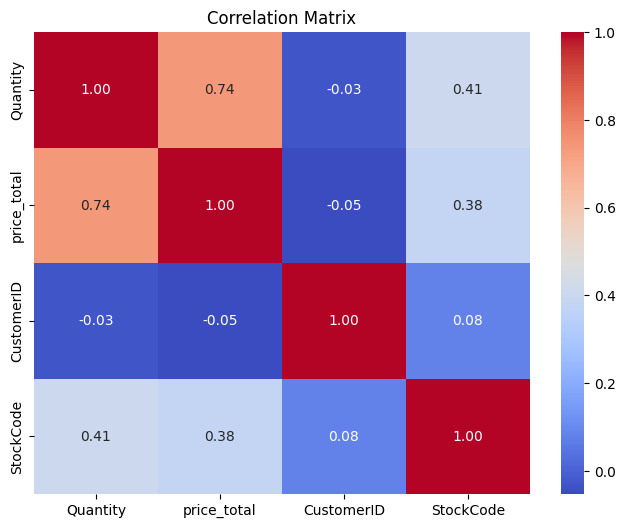

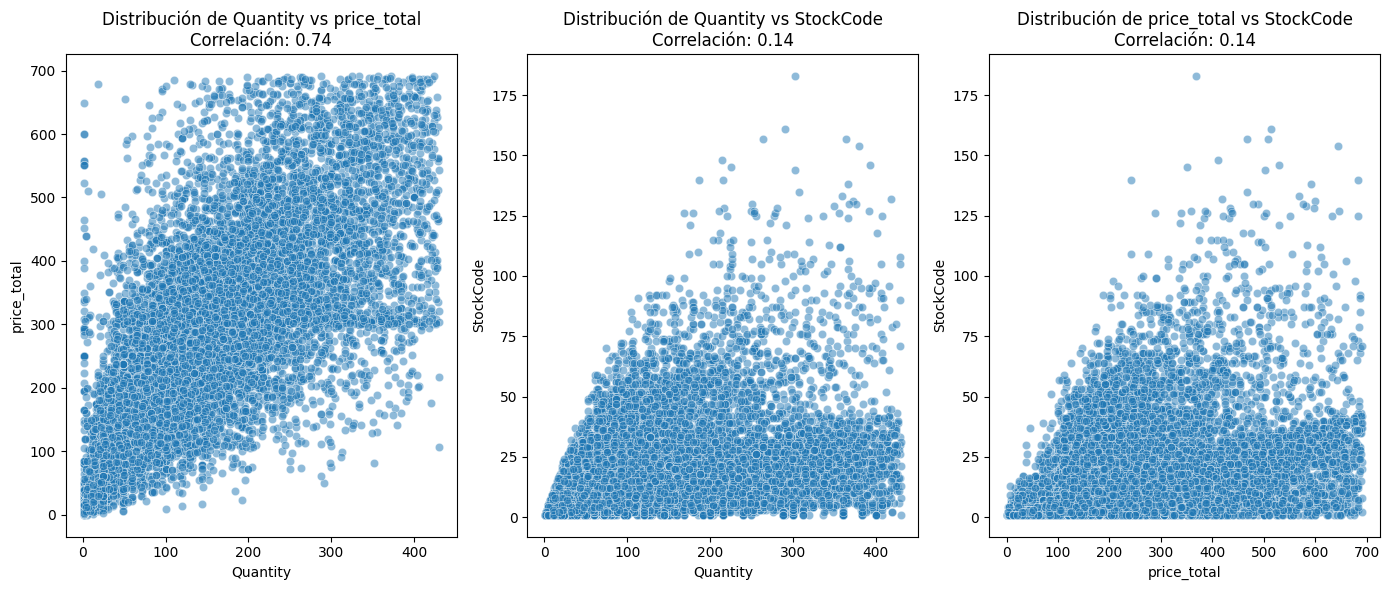

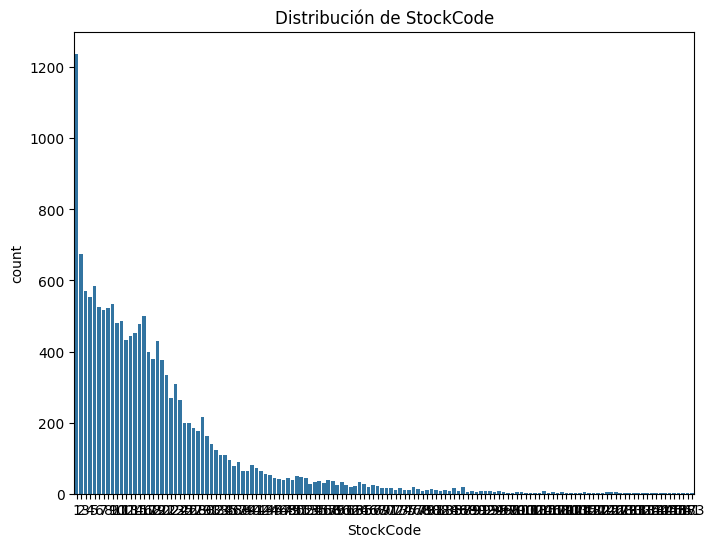

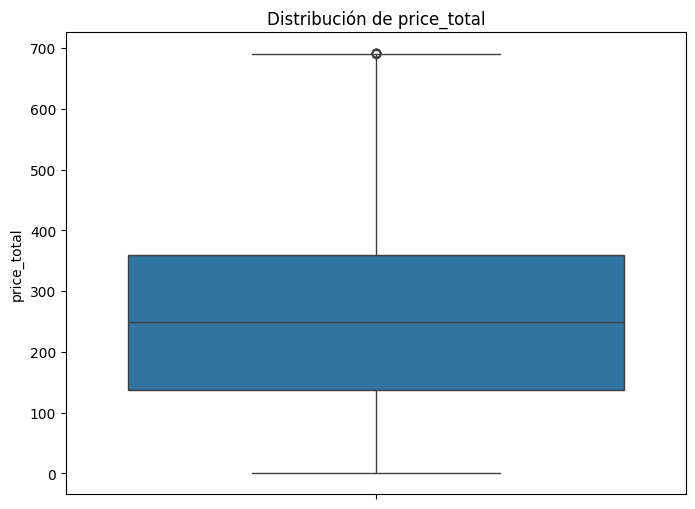

'Primeramente me daba una correlación de 0.91 entre cantidad y precio, chcando los graficos de distribución noté que no era tanta la correlación que tenían, por eso elimino los valores\natipicos de ambas variables y notamos una correlación más sensata en los graficos y en la correlación de 0.74, de igual forma aumenta la relación del StockCode de 0.14 a 0.41 con respecto\na la variable cantidad y de 0.14 a 0.38 en la variable precio aun que en los graficos notamos poca correlación.'

In [15]:
#FernandoSanchez Eliminar filas con valores negativos en 'Quantity' y 'price_total'
data = data[(data['Quantity'] > 0) & (data['price_total'] > 0)]

#FernandoSanchez Eliminar valores atípicos en 'Quantity' y 'price_total'
q1 = data['Quantity'].quantile(0.25)
q3 = data['Quantity'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
data = data[(data['Quantity'] >= lower_bound) & (data['Quantity'] <= upper_bound)]

q1 = data['price_total'].quantile(0.25)
q3 = data['price_total'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
data = data[(data['price_total'] >= lower_bound) & (data['price_total'] <= upper_bound)]

#FernandoSanchez Calcular matriz de correlación
correlation_matrix = data[['Quantity', 'price_total', 'CustomerID', 'StockCode']].corr()

#FernandoSanchez Visualizar matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


#FernandoSanchez Filtrar datos para valores de 'Quantity' menores o iguales a 20000 y de 'price_total' menores o iguales a 5000
filtered_data = data[(data['Quantity'] <= 20000) & (data['price_total'] <= 5000)]

#FernandoSanchez Visualizar distribuciones de las variables numéricas con información de correlación
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.scatterplot(data=filtered_data, x='Quantity', y='price_total', alpha=0.5)
plt.title(f'Distribución de Quantity vs price_total\nCorrelación: {0.74}')

plt.subplot(1, 3, 2)
sns.scatterplot(data=data, x='Quantity', y='StockCode', alpha=0.5)
plt.title(f'Distribución de Quantity vs StockCode\nCorrelación: {0.14}')

plt.subplot(1, 3, 3)
sns.scatterplot(data=data, x='price_total', y='StockCode', alpha=0.5)
plt.title(f'Distribución de price_total vs StockCode\nCorrelación: {0.14}')

plt.tight_layout()
plt.show()

#FernandoSanchez Gráfico de barras para la distribución de StockCode
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='StockCode')
plt.title('Distribución de StockCode')
plt.show()

#FernandoSanchez Boxplot para visualizar la distribución de 'price_total'
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, y='price_total')
plt.title('Distribución de price_total')
plt.show()

"""Primeramente me daba una correlación de 0.91 entre cantidad y precio, chcando los graficos de distribución noté que no era tanta la correlación que tenían, por eso elimino los valores
atipicos de ambas variables y notamos una correlación más sensata en los graficos y en la correlación de 0.74, de igual forma aumenta la relación del StockCode de 0.14 a 0.41 con respecto
a la variable cantidad y de 0.14 a 0.38 en la variable precio aun que en los graficos notamos poca correlación."""

2. Generar variables para la segmentación. Notar que la granularidad de la data es por
boleta y se necesita segmentar clientes, por lo que es necesario generar variables a
nivel de clientes. Se propone generar al menos RFM (Recencia, frecuencia y monto).

In [16]:
#FernandoSanchez Calcular Recencia, Frecuencia y Monto para cada cliente
today = data['InvoiceDate'].max()
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda date: (today - date.max()).days,  #FernandoSanchez Recencia
    'InvoiceNo': 'nunique',  #FernandoSanchez Frecuencia
    'price_total': 'sum'  #FernandoSanchez Monto total
}).reset_index()
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

#FernandoSanchez Visualizar las primeras filas del DataFrame RFM
print(rfm.head())

   CustomerID  Recency  Frequency  Monetary
0       12347        2          4   1667.64
1       12348       75          2    677.00
2       12350      310          1    334.40
3       12352       36          7   1665.74
4       12353      204          1     89.00


3. Realizar un análisis exploratorio y las transformaciones necesarias a las nuevas
variables.

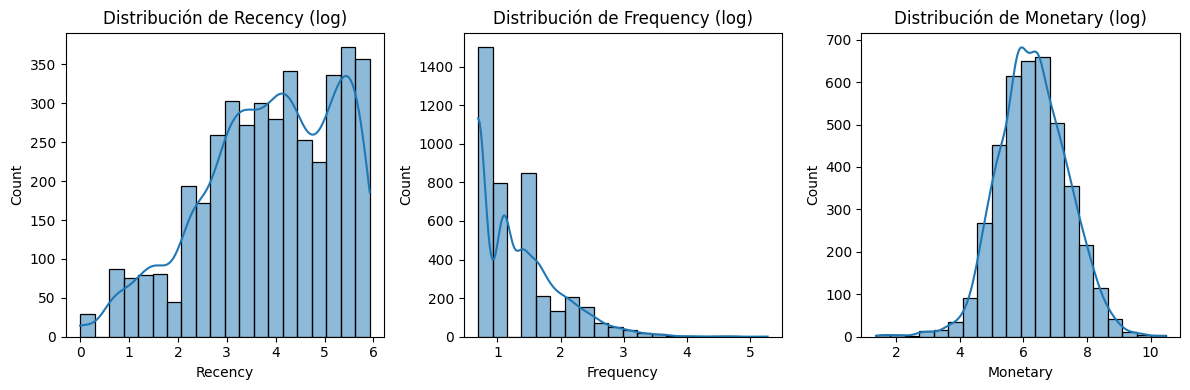

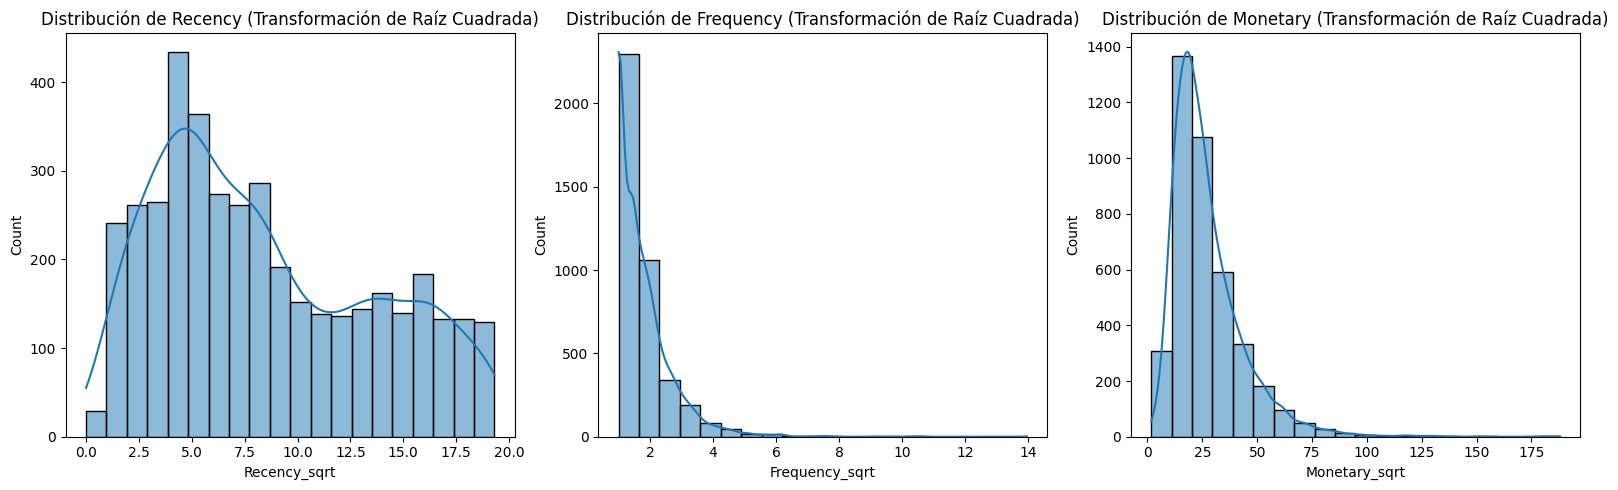

'Los graficos ya no muestran los outliers pero ninguna tiene su centro, las graficas tienen sesgos a la derecha'

In [25]:
#FernandoSanchez Aplicar transformación logarítmica a las variables RFM
rfm_log = rfm[['Recency', 'Frequency', 'Monetary']].apply(np.log1p)

#FernandoSanchez Visualizar distribuciones de las variables RFM transformadas
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(rfm_log['Recency'], bins=20, kde=True)
plt.title('Distribución de Recency (log)')

plt.subplot(1, 3, 2)
sns.histplot(rfm_log['Frequency'], bins=20, kde=True)
plt.title('Distribución de Frequency (log)')

plt.subplot(1, 3, 3)
sns.histplot(rfm_log['Monetary'], bins=20, kde=True)
plt.title('Distribución de Monetary (log)')

plt.tight_layout()
plt.show()

"""Los graficos revelan que Monetary el centro de sus datos cae cerca del 6 y 7, su extensión comprende del 4 al 9.
En recencia tenemos un grafico asimetrico con outlier en el 0 y sesgo a la izquierda, en frecuancia tenemos un grafico asimetrico con outliers en el 1 y sesgo a la derecha. """

#FernandoSanchez Aplicar transformación de raíz cuadrada a las variables RFM
rfm['Recency_sqrt'] = np.sqrt(rfm['Recency'])
rfm['Frequency_sqrt'] = np.sqrt(rfm['Frequency'])
rfm['Monetary_sqrt'] = np.sqrt(rfm['Monetary'])

#FernandoSanchez Visualizar las distribuciones transformadas
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
sns.histplot(rfm['Recency_sqrt'], bins=20, kde=True)
plt.title('Distribución de Recency (Transformación de Raíz Cuadrada)')

plt.subplot(1, 3, 2)
sns.histplot(rfm['Frequency_sqrt'], bins=20, kde=True)
plt.title('Distribución de Frequency (Transformación de Raíz Cuadrada)')

plt.subplot(1, 3, 3)
sns.histplot(rfm['Monetary_sqrt'], bins=20, kde=True)
plt.title('Distribución de Monetary (Transformación de Raíz Cuadrada)')

plt.tight_layout()
plt.show()

"""Los graficos ya no muestran los outliers pero ninguna tiene su centro, las graficas tienen sesgos a la derecha"""

4. Aplicar al menos 2 algoritmos de clustering. Buscar el número indicado de clusters
que pueden tener y visualizar los cluster resultantes de los algoritmos.

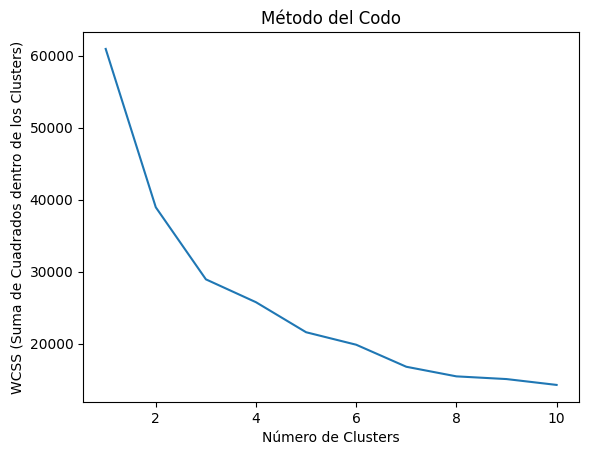

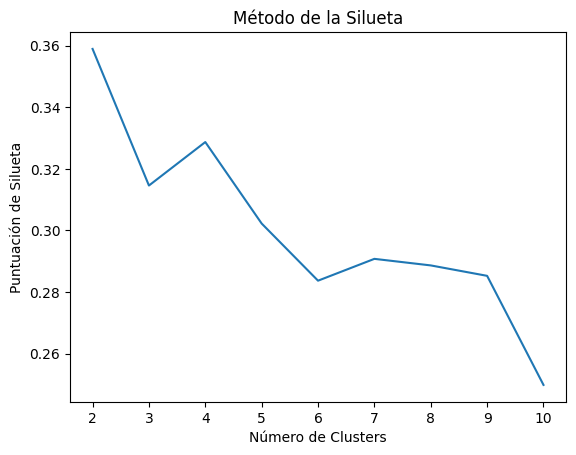

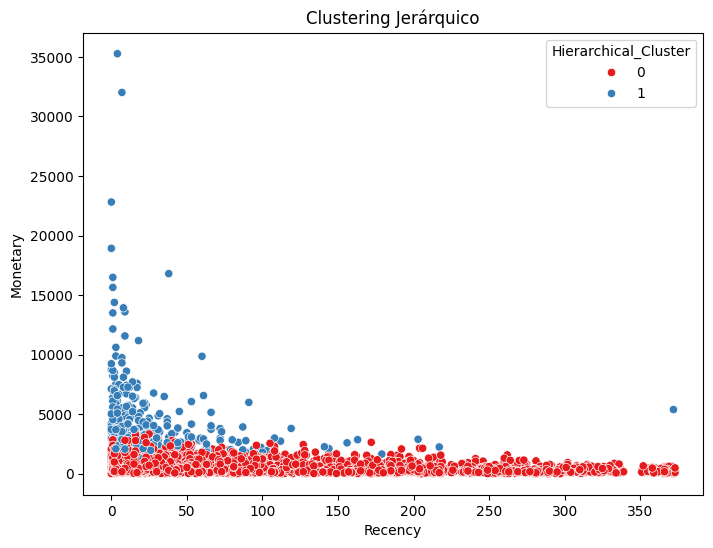

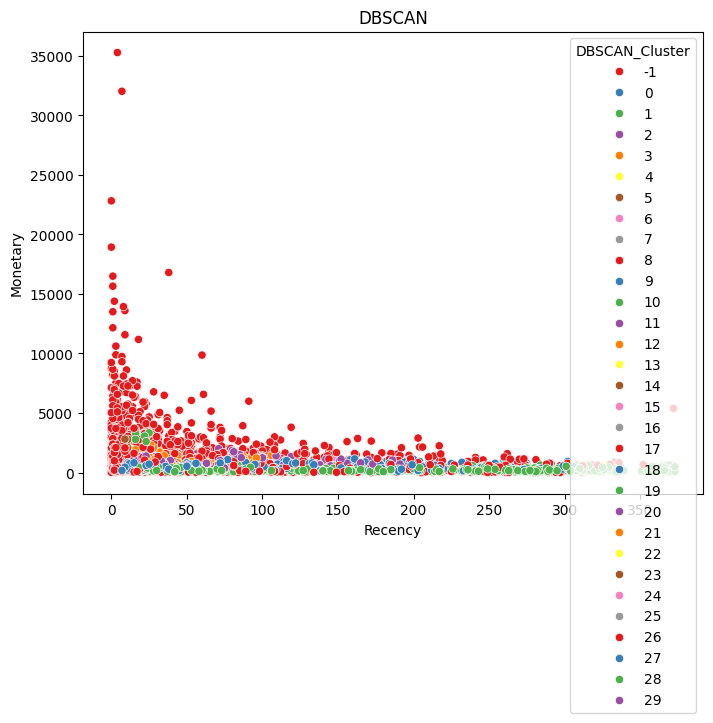

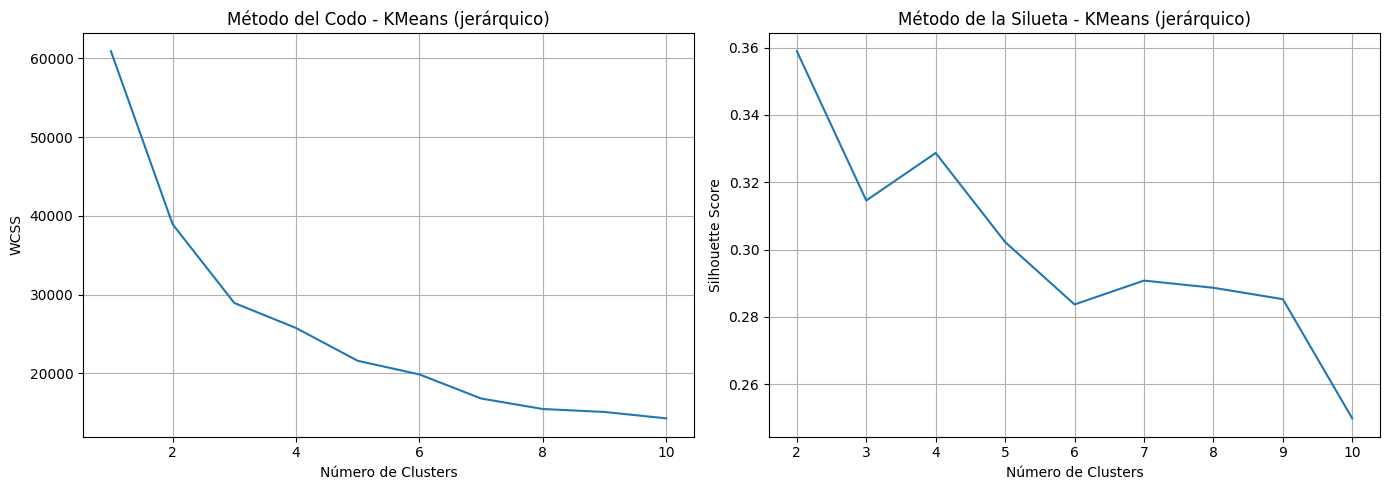

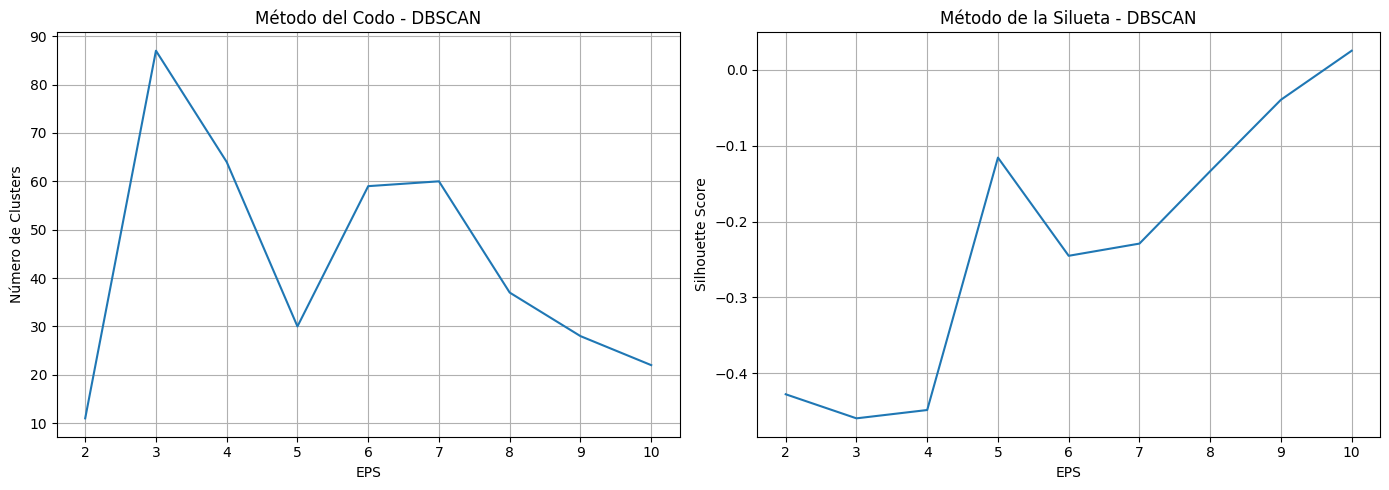

In [33]:
#FernandoSanchez Escalar los datos
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

#FernandoSanchez Reducir la dimensionalidad con PCA
pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)

#FernandoSanchez Método del codo para determinar el número óptimo de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

#FernandoSanchez Graficar el método del codo
plt.plot(range(1, 11), wcss)
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS (Suma de Cuadrados dentro de los Clusters)')
plt.show()

#FernandoSanchez Método de la silueta para determinar el número óptimo de clusters
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    kmeans.fit(rfm_scaled)
    silhouette_scores.append(silhouette_score(rfm_scaled, kmeans.labels_))

#FernandoSanchez Graficar el método de la silueta
plt.plot(range(2, 11), silhouette_scores)
plt.title('Método de la Silueta')
plt.xlabel('Número de Clusters')
plt.ylabel('Puntuación de Silueta')
plt.show()
"""En el metodo del codo notamos 2 codos muy leves y 1 más pronunciado que es el valor del codo esperado arriba de los 30000 y 2 en el numero de clusters.
En el metodo de silueta devuelve una línea pero si la analizamos los indices se maximizan con 2 clusters. """
#FernandoSanchez Escalar los datos
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

#FernandoSanchez Clustering jerárquico
agg_clustering = AgglomerativeClustering(n_clusters=2)
rfm['Hierarchical_Cluster'] = agg_clustering.fit_predict(rfm_scaled)

#FernandoSanchez Visualización del clustering jerárquico
plt.figure(figsize=(8, 6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Hierarchical_Cluster', palette='Set1')
plt.title('Clustering Jerárquico')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.show()

#FernandoSanchez DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
rfm['DBSCAN_Cluster'] = dbscan.fit_predict(rfm_scaled)

#FernandoSanchez Visualización de DBSCAN
plt.figure(figsize=(8, 6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='DBSCAN_Cluster', palette='Set1')
plt.title('DBSCAN')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.show()
"""El metodo DBSCAN deja escapar muchos posibles outliers, en el jerarquico no logre analizar el grafico. 
Dos metodos me indican dos clusters"""
#FernandoSanchez Método del codo para KMeans (jerárquico)
wcss_hierarchical = []
for i in range(1, 11):
    kmeans_hierarchical = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_hierarchical.fit(rfm_scaled)
    wcss_hierarchical.append(kmeans_hierarchical.inertia_)

#FernandoSanchez Método de la silueta para KMeans (jerárquico)
silhouette_scores_hierarchical = []
for n_clusters in range(2, 11):
    kmeans_hierarchical = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    kmeans_hierarchical.fit(rfm_scaled)
    silhouette_scores_hierarchical.append(silhouette_score(rfm_scaled, kmeans_hierarchical.labels_))

#FernandoSanchez Método del codo para DBSCAN
wcss_dbscan = []
for i in range(2, 11):
    dbscan = DBSCAN(eps=i*0.1, min_samples=5)
    dbscan.fit(rfm_scaled)
    labels_dbscan = dbscan.labels_
    n_clusters_dbscan = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
    wcss_dbscan.append(n_clusters_dbscan)

#FernandoSanchez Método de la silueta para DBSCAN
silhouette_scores_dbscan = []
for eps in range(2, 11):
    dbscan = DBSCAN(eps=eps*0.1, min_samples=5)
    dbscan.fit(rfm_scaled)
    silhouette_scores_dbscan.append(silhouette_score(rfm_scaled, dbscan.labels_))

#FernandoSanchez Visualizar resultados
plt.figure(figsize=(14, 5))

#FernandoSanchez Método del codo - KMeans (jerárquico)
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), wcss_hierarchical)
plt.title('Método del Codo - KMeans (jerárquico)')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.grid(True)

#FernandoSanchez Método de la silueta - KMeans (jerárquico)
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores_hierarchical)
plt.title('Método de la Silueta - KMeans (jerárquico)')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 5))

#FernandoSanchez Método del codo - DBSCAN
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss_dbscan)
plt.title('Método del Codo - DBSCAN')
plt.xlabel('EPS')
plt.ylabel('Número de Clusters')
plt.grid(True)

#FernandoSanchez Método de la silueta - DBSCAN
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores_dbscan)
plt.title('Método de la Silueta - DBSCAN')
plt.xlabel('EPS')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()
"""Confirmamos que el numero de clusters son 2 en el clustering jerarquico."""


5. Evaluar la calidad de los clustering de forma numérica y realizar una explicación de
cada segmento asignándoles un nombre descriptivo.

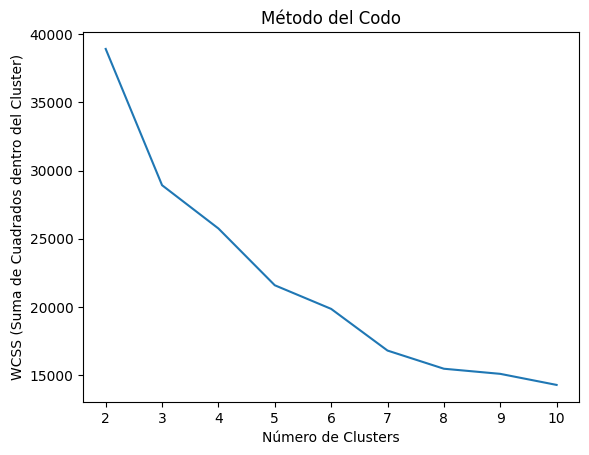

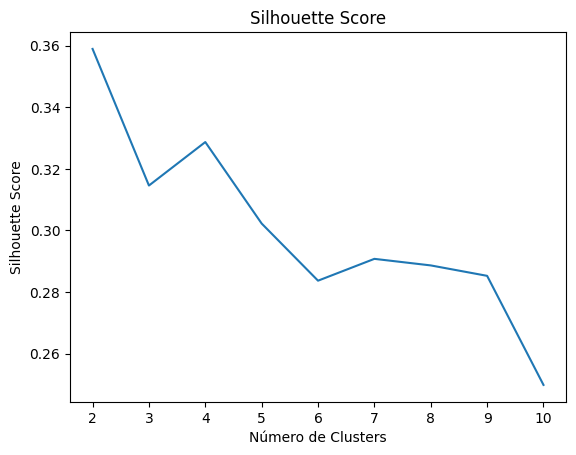

Número óptimo de clusters según el método del codo: 2
Número óptimo de clusters según el silhouette score: 2


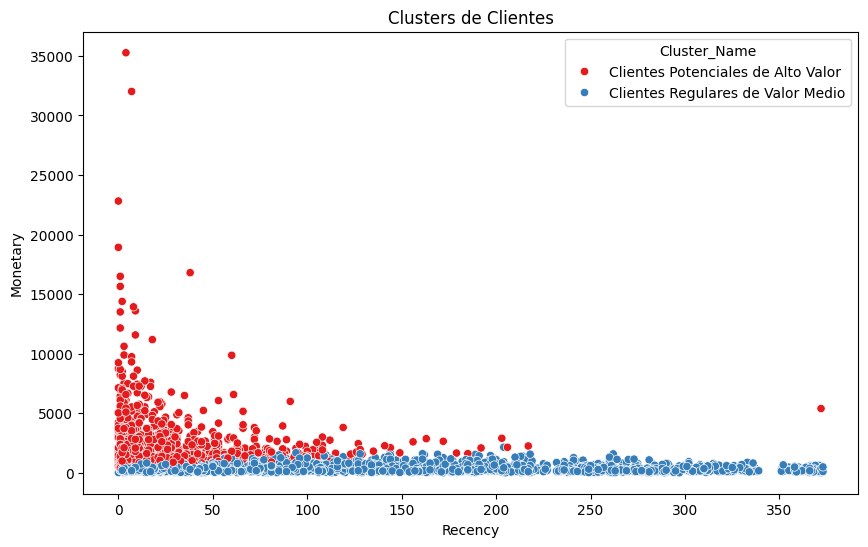

'Volvemos a confirmar que el numero de clusters son 2 y son los clientes potenciales de alto valor y otro de clientes regulares de valor medio.'

In [35]:
# Método del codo para determinar el número óptimo de clusters
wcss = []
silhouette_scores = []

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)
    
    if n_clusters > 1:  # Calculamos el silhouette score solo si hay más de un cluster
        silhouette_scores.append(silhouette_score(rfm_scaled, kmeans.labels_))

# Visualizar el método del codo
plt.plot(range(2, 11), wcss)
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS (Suma de Cuadrados dentro del Cluster)')
plt.show()

# Visualizar el silhouette score
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Determinar el número óptimo de clusters según el método del codo
optimal_clusters_elbow = np.argmin(np.diff(wcss)) + 2  # Sumamos 2 porque comenzamos desde 2 clusters
print("Número óptimo de clusters según el método del codo:", optimal_clusters_elbow)

# Determinar el número óptimo de clusters según el silhouette score
optimal_clusters_silhouette = np.argmax(silhouette_scores) + 2  # Sumamos 2 porque comenzamos desde 2 clusters
print("Número óptimo de clusters según el silhouette score:", optimal_clusters_silhouette)

# Ahora que tenemos el número óptimo de clusters, aplicamos KMeans con ese número
kmeans_optimal = KMeans(n_clusters=optimal_clusters_elbow, random_state=42)
rfm['Cluster'] = kmeans_optimal.fit_predict(rfm_scaled)

# Asignar nombres descriptivos a cada segmento
cluster_names = {
    0: "Clientes Potenciales de Alto Valor",
    1: "Clientes Regulares de Valor Medio",
    2: "Clientes Frecuentes de Alto Valor",
    # Agregar más nombres si es necesario para el número óptimo de clusters determinado
}

rfm['Cluster_Name'] = rfm['Cluster'].map(cluster_names)

# Visualizar los clusters en el espacio de Recency y Monetary
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster_Name', palette='Set1')
plt.title('Clusters de Clientes')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.show()

"""Volvemos a confirmar que el numero de clusters son 2 y son los clientes potenciales de alto valor y otro de clientes regulares de valor medio."""